### From Biological to Artificial Neurons

ANN (Artificial Neural Network) is inspired from the neurons found in our brains. The first architectural nn was based on how animal brains perform complex computations usign propositional logic. Today we have huge amount of data avaialble to train neural networks, which often outperform many other ML Techniques. The infrastructure is vastly improved, from powerful GPUs to cloud architectures, it's accessible to everyone. 

__Biological Neurons__

the biological neurons 
- composed of cell boy, containing the nucleus and most of the cell's complex components
- dendrites are the braching extensions
- axon is the very long extension
- at the extrmity of the axon splits into braches called the telodentria
- at the tip of these branches are minuscule structures called synaptic terminal which are connected to hte dendrites
- action potentials are the electrical impulses produced by axons
- synapes (or synaptic terminal) release the chemical called neurotransmitters

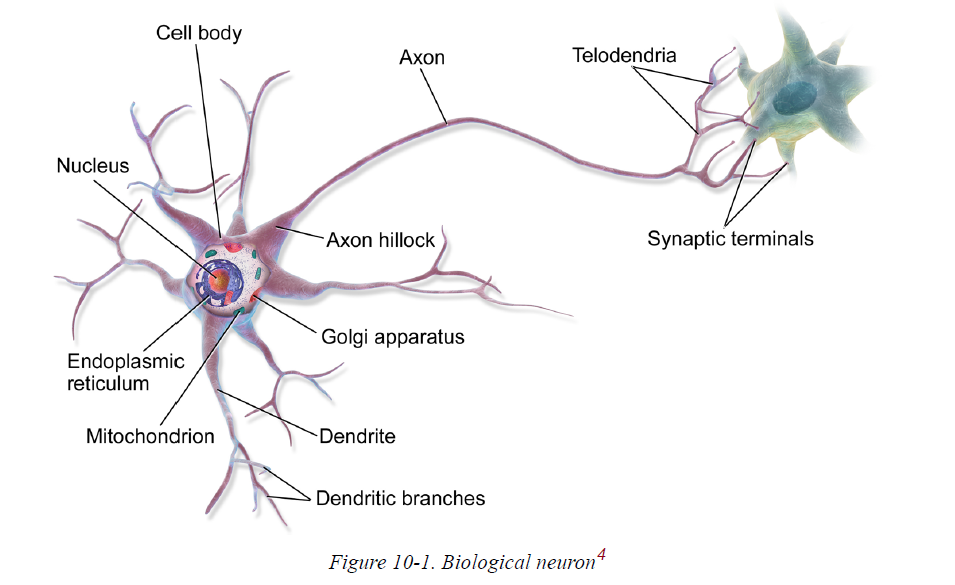


__Logical COmputations with Neurons__

First simple artificial neuron was binary output with multiple binary input. the AN activates when more than a certain number of inputs are active. this followed a logical flow of computation from inputs to outputs.

__Perceptron__

perceptron is one of the simplest ANN architecture (invented in 1957, by Frank Rosenblatt). It uses threshold logic unit (TLU), sometimes a linear threshold unit (LTU). The inputs and outputs are numbers (instead of binary) and each input conenction has a weight. the final input is the weighted sum of the inputs, which goes in the step function (most common - heaviside step function) and the output is the output of this step function. 

heaviside(z) = 0 if z< threshold else 1

A perceptron is composed of a single layer of TLUs with each TLU connected to all the inputs. 

- When all the neurons in the layer are connectec to the neurons in the previous layer, it's called fully connected layer (or dense layer)
- The inputs of the Perceptron are fed to special passthrough neurons called input neurons
- all the input neurons form the input layer
- an addtional bias term is add, called bias neuron

Computing the output of the fully connected layer

$h_{W,b}(X) = \phi (XW + b)$

- X is matrix of the input features
- W is matrix of the weights
- b is the bias vetor
- $\phi$ is the activation fuction

__Training a perceptron__

- Cells that file together, wire together (Hebb's rule / Hebbian Learning)
- Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction
- the Perceptron learning rule reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

$w_{i,j}^{(next step)} = w_{i,j} + η(y_j − ˆy_j)x_i$


- x is the input value
- ^y is the output  value
- y is the actual value
- w is the weight between the two instances
- η is the learning rate

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()

X = iris.data[:,(2,3)]
y = (iris.target ==0).astype(np.int)

<ipython-input-3-5ca627441930>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target ==0).astype(np.int)


In [4]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

In [5]:
y_pred

array([0])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: 
- loss="perceptron", 
- learning_rate="constant",
- eta0=1 (the learning rate),
- penalty=None (no regularization).

Perceptron do not output a class probability, they make predictions based on hard threshold. 

__The Multilayer Perceptron and Backpropogation__

- An MLP is composed of one (passthrough) input layer,
- one or more layers of TLUs, called hidden layers, 
- and one final layer of TLUs called the output layer
- The layers close to the input layer are usually called the lower layers, 
- and the ones close to the outputs are usually called the upper layers. 
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer.


Feedforward NN - when the flow is in one direction

Deep NN - when the ANN contains a deep stack of hidden layers.

__Backpropagation__

Backpropogation provides effecient calcuation of the weights in less numebr of passes. it can find out how each connection
weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Working of backpropagation:

- handles mini batch at a time, and it goes through the full training set multiple times. Each time is called an _epoch_
- each mini batch is passed to the network's input layer, which sends it to the first hidden layer.
    - the algorithms then computes the output of all the neurons in this layer. 
    - The result is passed to the next layer, its output is computed an passed to the next latyer and so on 
    - until we get the output of the last layer
    - this is forward pass
- next the algorithm measures the netowrk's output error
- then it computes how much each output connection contributed to the error. it's done using _chain rule_
- then it measures how much of these error contributions came form each connection in the layer below, again using the chain rule
- finally, it performs the gradient descent step to tweak all the connection weights in the network, using the error gradients it just compared

In order for this algorithm to work properly, the step function is replaced with the logistic (sigmoid) function, σ(z) = 1 / (1 + exp(–z)). since step function contains only flat segments, so there is no gradient to work with while the logistic
function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step.

the algo works well with many other activation functions, not just the logistic function.

- hyperbolic tangent function tanh(z) = 2 $\sigma$ (2z) - 1
    - this is S-shaped
    - continous
    - differentiable
    - output value ranges from -1 to 1
    - the range tends to make each laer's output less centered around 0 at the beginning, speeding up the convergence
- rectified linear unit function ReLU(z) = max(0,z)
    - continuos
    - not differentiable at z =0 
    - derivative is 0 for z <0
    - in practce, it's faster to compute
    
Why do we need activation functions at all?

- if we chain linear transformations, the result is a linear transformation
- So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. 
- Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.


### Regression MLPs

MLPs can perform regression, we need one output neuron for regression which is the predicted value. for multi-variate regression, we need one neuron per class. 

__Activation Function__

- In general, we avoid a activation function at the output for regression, so the output is not bound by activation function.
- If we want a positive output always, then we can use ReLU activation function or we can use a softplus activation function, which is smooth vairant of the ReLU: softplus(z) = log(1+ exp(z)). it's close to 0 when z is negative, and close to z when z is positive. 
- if we want output to be in a range of values, then we can use the logistic function or the hyperbolic tangent and then scale the labels to the appropiate range.

__Loss Function__

- The loss function to use during training is typically the mean squared error,
- but if there are lot of outliers in the training set, we can use the mean absolute error instead. 
- Alternatively, we can use the Huber loss, which is a combination of both. Huber loss is quadratic when the error is less than a threshold, and linear when the error is larger than threshold
